In [1]:
import numpy as np
import pandas as pd
import os

### Load the training data:
* normalize XYZ with the 1st Atom
* get the distance of each 2 Atoms
* get the angle of each 3 Atoms
* get the angle of each 5 Atoms

In [2]:
PATH = 'test01.pdb' 
#PATH = 'test01A.pdb' 
#PATH = 'test01B.pdb' 
#PATH = 'test01C.pdb' 

In [3]:
data = pd.read_csv(PATH,sep='\s+')

data.columns = ['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998
ATOM       1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0
ATOM       2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0
ATOM       3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0
ATOM       4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0
ATOM       5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0
ATOM       6   C6  OLA         1  48.83  25.06  53.72   1.0          0.0
ATOM       7   C7  OLA         1  48.14  24.56  52.45   1.0          0.0
ATOM       8   C8  OLA         1  48.63  24.69  51.00   1.0          0.0
ATOM       9   C9  OLA         1  47.74  24.05  49.94   1.0          0.0
ATOM      10  C10  OLA         1  47.84  24.38  48.59   1.0          0.0
ATOM      11  C11  OLA         1  48.72  25.47  47.99   1.0          0.0
ATOM      12  C12  OLA         1  48.41  25.61  46.50   1.0          0.0
ATOM      13  C13  OLA         1  48.72  24.41  45.60   1.0          0.0
ATOM      14  C14  OLA         1  48.48  24.71  44.12   1.0          0.0
ATOM      15  C15  OLA         1  48.57  23.44  43.28   1.0          0.0
ATOM      16  C16  OLA         1  48.50  23.68  41.77   1.0          0.0
ATOM      17  C17  OLA         1  48.90  22.41  41.02   1.0          0.0
ATOM      18  C18  OLA         1  48.76  22.47  39.50   1.0          0.0
ATOM      19  O19  OLA         1  47.93  23.21  38.97   1.0          0.0
ATOM      20  O20  OLA         1  49.74  21.80  38.83   1.0          0.0
ATOM      21  H21  OLA         1  49.49  22.15  37.93   1.0          0.0

### Get the angle of each 3 Atoms

In [4]:
def angle_sign2(p1, p2, p3):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    res = np.dot(d1, d2)
    return 1 if  res> 0 else -1

def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    #sign = angle_sign2(a, b, c)
    return(np.degrees(angle))

def dots_angle(data):
    data.index = range(len(data))
    angles = [0]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        angles.append(get_angle(a, b, c))
    angles.append(0)
    return(angles)

In [5]:
data['dots-angle'] = dots_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES      X      Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1  44.29  24.62  58.04   1.0          0.0   
1        2   C2  OLA         1  44.63  25.19  56.66   1.0          0.0   
2        3   C3  OLA         1  46.04  24.71  56.29   1.0          0.0   
3        4   C4  OLA         1  46.63  25.14  54.94   1.0          0.0   
4        5   C5  OLA         1  48.05  24.57  54.94   1.0          0.0   
5        6   C6  OLA         1  48.83  25.06  53.72   1.0          0.0   
6        7   C7  OLA         1  48.14  24.56  52.45   1.0          0.0   
7        8   C8  OLA         1  48.63  24.69  51.00   1.0          0.0   
8        9   C9  OLA         1  47.74  24.05  49.94   1.0          0.0   
9       10  C10  OLA         1  47.84  24.38  48.59   1.0          0.0   
10      11  C11  OLA         1  48.72  25.47  47.99   1.0          0.0   
11      12  C12  OLA         1  48.41  25.61  46.50   1.0          0.0   
12      13  C13  OLA         1  48.72  24.41  45.60   1.0          0.0   
13      14  C14  OLA         1  48.48  24.71  44.12   1.0          0.0   
14      15  C15  OLA         1  48.57  23.44  43.28   1.0          0.0   
15      16  C16  OLA         1  48.50  23.68  41.77   1.0          0.0   
16      17  C17  OLA         1  48.90  22.41  41.02   1.0          0.0   
17      18  C18  OLA         1  48.76  22.47  39.50   1.0          0.0   
18      19  O19  OLA         1  47.93  23.21  38.97   1.0          0.0   
19      20  O20  OLA         1  49.74  21.80  38.83   1.0          0.0   
20      21  H21  OLA         1  49.49  22.15  37.93   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
5   109.130631  
6   127.755005  
7   115.752242  
8   122.155375  
9   126.320389  
10  109.403913  
11  117.388916  
12  112.535424  
13  111.125859  
14  114.208054  
15  109.992593  
16  115.575398  
17  120.894351  
18   29.208989  
19   69.045526  
20    0.000000

### Normalize XYZ with the 1st Atom

In [6]:
data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
display(data)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  
0     0.000000  
1   107.748079  
2   118.529798  
3   104.618734  
4   110.738952  
5   109.130631  
6   127.755005  
7   115.752242  
8   122.155375  
9   126.320389  
10  109.403913  
11  117.388916  
12  112.535424  
13  111.125859  
14  114.208054  
15  109.992593  
16  115.575398  
17  120.894351  
18   29.208989  
19   69.045526  
20    0.000000

### Get the distance of each 2 Atoms

In [7]:
def dots_distance(data):
    data.index = range(len(data))
    distances = []
    for k in range(len(data)-1):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        squared_dist = np.sum((p1-p2)**2, axis=0)
        dist = np.sqrt(squared_dist)
        distances.append(dist)
    distances.append(0)
    return(distances)

In [8]:
data['dots-distance'] = dots_distance(data)
display(data)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  
0     0.000000       1.531307  
1   107.748079       1.534731  
2   118.529798       1.534764  
3   104.618734       1.530131  
4   110.738952       1.528692  
5   109.130631       1.529379  
6   127.755005       1.536066  
7   115.752242       1.524893  
8   122.155375       1.393341  
9   126.320389       1.523975  
10  109.403913       1.528332  
11  117.388916       1.531698  
12  112.535424       1.529052  
13  111.125859       1.525320  
14  114.208054       1.530555  
15  109.992593       1.528202  
16  115.575398       1.527613  
17  120.894351       1.231828  
18   29.208989       2.298652  
19   69.045526       0.997497  
20    0.000000       0.000000

### Get the angle of each 4 Atoms

In [9]:
# calculate the singe (+/-) of two planes A and B
# A=(p1, p2, p3); B=(p2,p3,p4)
def angle_sign(p1, p2, p3, p4):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    p4 = list(p4)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    d3 = np.array(p3) - np.array(p4)
    # (d1 x d2) * d3
    res = np.dot(np.cross(d1, d2), d3)
    return 1 if  res> 0 else -1

In [10]:
p1 = np.array([0, 0, 0])
p2 = np.array([1,0,0])
p3 = np.array([2,1,0])
p4 = np.array([2.34, 0.52, 3.1])

In [11]:
angle_sign(p1, p2, p3, p4)
angle_sign2(p2, p3, p4)

-1

In [12]:
np.linalg.det(np.array([p2, p3, [0,0,1]]) )

1.0

In [13]:
np.abs(-1)

1

In [14]:
np.cross(p3-p1, p3-p2) + p3

array([2, 1, 1])

In [15]:
alpha = get_angle(p1, p2, p3)
alpha

135.0

In [16]:
np.cos((180-alpha) *np.pi/180)

0.7071067811865476

In [17]:
c_norm = np.linalg.norm(p3-p2)
b_norm = np.linalg.norm(p2-p1)

In [18]:
p4 = (p2-p1) + (p2-p1) * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) + p1

In [19]:
p5 = (p4-p3) + (p4-p3) + p4

In [20]:
np.cos((180-45) *np.pi/180)

-0.7071067811865475

In [21]:
def dots_extend_mirror(a, b, c):
    a = np.array(list(a))
    b = np.array(list(b))
    c = np.array(list(c))
    v_ab = b - a # vector from point b to a
    v_bc = c - b # vector from point c to b
    c_norm = np.linalg.norm(v_bc) # norm of vector bc
    b_norm = np.linalg.norm(v_ab) # # norm of vector ab
    alpha = get_angle(a, b, c) # dots angle between a, b, c
    v_ad = v_ab + v_ab * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) # vector ad extended from vector ab 
    d = v_ad + a # coordinates of middel point d, which is extended from vector ab
    v_cd = d - c # vector from point c to d
    v_ce = v_cd + v_cd # vector ce extended from vector cd
    e = v_ce + c # coordinates of mirrored point e, which is extended from vector cd
    return(e)

In [22]:
dots_extend_mirror(a=[0, 0, 0], b=[1, 0, 0], c=[2, 1, 0])

array([ 2., -1.,  0.])

In [23]:
#get_mirror_xyz(point1=[1,0,0], point2=[0,0,0], point3=[0,1,0], point4=[0.5,0.5,0])

In [24]:
import math

# Equation of a plane through three points
# https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
def dots_plane(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p2 - p1
    return(np.cross(v1, v2))


def dots_crossprod(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p3 - p2
    return(np.cross(v1, v2)+p3)

def dots_plane_d(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    # These two vectors are in the plane
    v1 = p3 - p1
    v2 = p2 - p1
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp
    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d = np.dot(cp, p3)
    return (a,b,c,d)


# Function to mirror image
# https://www.geeksforgeeks.org/mirror-of-a-point-through-a-3-d-plane/
def mirror_point(a, b, c, d, x1, y1, z1):
    k = -2*(a*x1 + b*y1 + c*z1 + d)/float((a*a + b*b + c*c))
    x3 = a * k + x1
    y3 = b * k + y1
    z3 = c * k + z1
    return([x3, y3, z3])

# get mirrored point4, given a plane defined by point1, point2, point3 
def get_mirror_xyz(point1, point2, point3, point4):
    p1 = np.array(list(point1))
    p2 = np.array(list(point2))
    p3 = np.array(list(point3))
    p4 = np.array(list(point4))
    offset = p1
    p4 = p4 - offset
    a,b,c,d = dots_plane_d(p1-offset, p2-offset, p3-offset)
    pm = mirror_point(a, b, c, d, p4[0], p4[1], p4[2])
    ans = pm + offset
    return(ans)



def plane_sign(p1, p2, p3, p4):
    p1 = np.array(list(p1))
    p2 = np.array(list(p2))
    p3 = np.array(list(p3))
    p4 = np.array(list(p4))
    v1 = p2 - p1
    v2 = p3 - p2
    v3 = p4 - p3
    return np.dot(v3, np.cross(v1,v2))
    
# Find the Angle between two planes in 3D.
# https://www.geeksforgeeks.org/angle-between-two-planes-in-3d/
def planes_angle(a1, b1, c1, a2, b2, c2, solve=False):
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    sign = 1
    #sign = 1 if np.linalg.det(np.array([[a1,b1,c1], [a2,b2,c2], [0,0,1]]) ) > 0 else -1
    #sign = 1 if np.linalg.det(np.array([[a1,b1,c1], [a2,b2,c2], [a1,b1,c1]]) ) > 0 else -1
    #sign = np.dot(np.array([a1,b1,c1]), np.array([a2,b2,c2]))
    #sign = 1 if sign>0 else -1
    #if solve: sign=1
    return(A)

def surface_angle(data):
    data.index = range(len(data))
    angles = [0,0]
    for k in range(len(data)-3):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        #e = data.loc[k+4, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,d)
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        #sign = 1 if plane_sign(a, b, c, d) >= 0 else -1
        angles.append(A)
    angles.append(0)
    #angles.append(0)
    return(angles)

In [25]:
p1=[1,0,0]
p2=[0,3,0]
p3=[1,3,0]
a, b, c, d = dots_plane_d(p1, p2, p3)
print(a, b, c, d)
x1 = 1
y1 = 10
z1 = 4
 
# function call
mirror_point(a, b, c, d, x1, y1, z1) 

0 0 3 0


[1.0, 10.0, -4.0]

In [26]:
data['planes-angle'] = surface_angle(data)
display(data)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
5   109.130631       1.529379     62.135786  
6   127.755005       1.536066    173.786140  
7   115.752242       1.524893    178.162792  
8   122.155375       1.393341    162.270369  
9   126.320389       1.523975      5.695876  
10  109.403913       1.528332    173.424474  
11  117.388916       1.531698     64.163301  
12  112.535424       1.529052    175.129467  
13  111.125859       1.525320    170.479853  
14  114.208054       1.530555    173.370432  
15  109.992593       1.528202    167.709527  
16  115.575398       1.527613    174.978988  
17  120.894351       1.231828     27.576745  
18   29.208989       2.298652    170.093365  
19   69.045526       0.997497    179.487648  
20    0.000000       0.000000      0.000000

In [27]:
get_mirror_xyz([2.34,0.52,-3.1],[3.684,-0.208,-3.183],[4.334,0.010,-4.547],[3.839,0.139,-5.323])

array([ 4.20553327,  0.78400961, -5.04524434])

In [28]:
data_sim = data.copy()
data_sim

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
5   109.130631       1.529379     62.135786  
6   127.755005       1.536066    173.786140  
7   115.752242       1.524893    178.162792  
8   122.155375       1.393341    162.270369  
9   126.320389       1.523975      5.695876  
10  109.403913       1.528332    173.424474  
11  117.388916       1.531698     64.163301  
12  112.535424       1.529052    175.129467  
13  111.125859       1.525320    170.479853  
14  114.208054       1.530555    173.370432  
15  109.992593       1.528202    167.709527  
16  115.575398       1.527613    174.978988  
17  120.894351       1.231828     27.576745  
18   29.208989       2.298652    170.093365  
19   69.045526       0.997497    179.487648  
20    0.000000       0.000000      0.000000

### Solve 3 equations, to get x,y,z of D, given A, B, C
* C, D := dot_distance
* B, C, D := dot_angle
* A, B, C, D := planes-angle

In [29]:
from scipy.optimize import fsolve
import random

def p1p2(p1, p2):
    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)
    return dist

def solve_d(data, k):
    a = data.loc[k, ['X', 'Y', 'Z']]
    b = data.loc[k+1, ['X', 'Y', 'Z']]
    c = data.loc[k+2, ['X', 'Y', 'Z']]
    #d = data.loc[k+3, ['X', 'Y', 'Z']]
    feature = data.loc[k+2,["dots-angle", "dots-distance", "planes-angle"]]

    def fn0(w):
        sign = 1
        #sign = angle_sign2(b, c, w)
        return sign*get_angle(b, c, w)

    def fn1(w):
        return p1p2(c, w)

    def fn2(w):
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,w)
        sign = 1
        #sign = 1 if plane_sign(a, b, c, w) >= 0 else -1
        A = planes_angle(x1, y1, z1, x2, y2, z2, solve=True)
        return sign*A
    
    def myFunction(w):
       F = np.empty((3))
       F[0] = fn0(w) - feature[0]
       F[1] = fn1(w) - feature[1]
       F[2] = fn2(w) - feature[2]
       return F
    
    wGuess = np.array([0.1, 0.1, 0.1])
    w = fsolve(myFunction,wGuess)
    
    ## w2 is mirror of w from the plane of points a, b, c
    w2 = get_mirror_xyz(a,b,c,w)
    
    ## w3 is mirror of w from extended vector b c
    w3 = dots_extend_mirror(b, c, w)
    
    ## w4 is mirror of w2 from extended vector b c
    w4 = dots_extend_mirror(b, c, w2)
    
    ans = [w, w2, w3, w4]
    #return ans[np.random.choice(3)]
    return ans

In [30]:
data_sim = data.copy()
display(data_sim)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
5   109.130631       1.529379     62.135786  
6   127.755005       1.536066    173.786140  
7   115.752242       1.524893    178.162792  
8   122.155375       1.393341    162.270369  
9   126.320389       1.523975      5.695876  
10  109.403913       1.528332    173.424474  
11  117.388916       1.531698     64.163301  
12  112.535424       1.529052    175.129467  
13  111.125859       1.525320    170.479853  
14  114.208054       1.530555    173.370432  
15  109.992593       1.528202    167.709527  
16  115.575398       1.527613    174.978988  
17  120.894351       1.231828     27.576745  
18   29.208989       2.298652    170.093365  
19   69.045526       0.997497    179.487648  
20    0.000000       0.000000      0.000000

In [31]:
k=0
solve_d(data_sim, k)

[array([ 2.34260354,  0.52542591, -3.09711741]),
 array([ 2.34,  0.52, -3.1 ]),
 array([ 2.50430144, -0.80394675, -0.75632574]),
 array([ 2.50690498, -0.79852085, -0.75344315])]

In [32]:
ans = solve_d(data_sim, k)
ans
p1p2(data_sim[['X','Y','Z']].iloc[k], data_sim[['X','Y','Z']].iloc[k+3])

3.9186732448623505

In [33]:
list(range(3,5))

[3, 4]

In [34]:
np.argmax(np.array([3,5,1]))

1

In [35]:
np.random.choice([[1],[1,2]])

/home/fengchenliu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


[1]

In [36]:
def run_sim_df(data_sim, d=0, m=0):
    for k in range(m, len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = data_sim[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        d_max = np.argmax(l)
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_max, d_random], p=[0.95, 0.05])
        data_sim.at[k+3, 'X'] = xyz_sim[d][0]
        data_sim.at[k+3, 'Y'] = xyz_sim[d][1]
        data_sim.at[k+3, 'Z'] = xyz_sim[d][2]

    #list(data_sim.columns)

    sim = data_sim.copy()
    obs = data.copy()

    #sim.index = ['ATOM' for k in range(len(sim))]
    #obs.index = ['ATOM' for k in range(len(obs))]
    sim.index = [k for k in range(len(sim))]
    obs.index = [k for k in range(len(obs))]

    sim['X'] = sim['X'].astype(np.double)
    sim['Y'] = sim['Y'].astype(np.double)
    sim['Z'] = sim['Z'].astype(np.double)

    obs['X'] = obs['X'].astype(np.double)
    obs['Y'] = obs['Y'].astype(np.double)
    obs['Z'] = obs['Z'].astype(np.double)

    sim = sim.round(3)
    obs = obs.round(3)
    #print(sim)
    #print(obs)

    #sim[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_sim.pdb', sep =',')
    #obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].round(3).to_csv('data_obs.pdb', sep =',')

    tmpdf = pd.concat([obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']], 
               sim[['dots-angle', 'dots-distance','planes-angle', 'X','Y','Z']]], axis=1)
    tmpdf.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle',
                    'Xsim','Ysim','Zsim']
    return(tmpdf)

In [37]:
data_sim1 = data.copy()
data_sim2 = data.copy()
data_sim3 = data.copy()
data_sim4 = data.copy()

data_sim1 = run_sim_df(data_sim1, d=0, m=0)
data_sim2 = run_sim_df(data_sim2, d=1, m=0)
data_sim3 = run_sim_df(data_sim3, d=2, m=0)
data_sim4 = run_sim_df(data_sim4, d=3, m=0)

In [38]:
#data_sim1.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim2.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim3.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim4.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']

data_sim1.index = ['ATOM' for k in range(len(data_sim1))]
data_sim2.index = ['ATOM' for k in range(len(data_sim2))]
data_sim3.index = ['ATOM' for k in range(len(data_sim3))]
data_sim4.index = ['ATOM' for k in range(len(data_sim4))]

display(data_sim1)
display(data_sim2)
display(data_sim3)
display(data_sim4)

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1  0.00  0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1  2.34  0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1  3.76 -0.05  -3.10   1.0          0.0   
ATOM       6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
ATOM       7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
ATOM       8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
ATOM       9   C9  OLA         1  3.45 -0.57  -8.10   1.0          0.0   
ATOM      10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
ATOM      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
ATOM      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
ATOM      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
ATOM      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
ATOM      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
ATOM      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
ATOM      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
ATOM      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
ATOM      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
ATOM      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
ATOM      21  H21  OLA         1  5.20 -2.47 -20.11   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000   0.000  
ATOM     107.748          1.535         0.000   0.340   0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343   0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692  -0.192  -3.175  
ATOM     109.131          1.529        62.136   4.335   0.012  -4.547  
ATOM     127.755          1.536       173.786   5.659   0.758  -4.374  
ATOM     115.752          1.525       178.163   6.585   1.298  -5.475  
ATOM     122.155          1.393       162.270   7.868   1.966  -4.992  
ATOM     126.320          1.524         5.696   8.619   2.808  -5.810  
ATOM     109.404          1.528       173.424   9.841   3.617  -5.392  
ATOM     117.389          1.532        64.163  10.459   4.275  -6.625  
ATOM     112.535          1.529       175.129  10.455   5.806  -6.683  
ATOM     111.126          1.525       170.480  10.989   6.343  -8.011  
ATOM     114.208          1.531       173.370  10.756   7.846  -8.130  
ATOM     109.993          1.528       167.710  11.405   8.487  -9.359  
ATOM     115.575          1.528       174.979  10.869   9.905  -9.553  
ATOM     120.894          1.232        27.577  11.344  10.622 -10.816  
ATOM      29.209          2.299       170.093  10.653  11.494 -11.345  
ATOM      69.046          0.997       179.488  12.635  10.345 -11.155  
ATOM       0.000          0.000         0.000  12.690  11.035 -11.872

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1  0.00  0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1  2.34  0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1  3.76 -0.05  -3.10   1.0          0.0   
ATOM       6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
ATOM       7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
ATOM       8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
ATOM       9   C9  OLA         1  3.45 -0.57  -8.10   1.0          0.0   
ATOM      10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
ATOM      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
ATOM      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
ATOM      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
ATOM      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
ATOM      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
ATOM      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
ATOM      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
ATOM      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
ATOM      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
ATOM      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
ATOM      21  H21  OLA         1  5.20 -2.47 -20.11   1.0          0.0   

      dots-angle  dots-distance  planes-angle   Xsim    Ysim   Zsim  
ATOM       0.000          1.531         0.000  0.000   0.000  0.000  
ATOM     107.748          1.535         0.000  0.340   0.570 -1.380  
ATOM     118.530          1.535       179.858  1.750   0.090 -1.750  
ATOM     104.619          1.530       176.529  2.343   0.525 -3.097  
ATOM     110.739          1.529       173.206  3.692  -0.192 -3.175  
ATOM     109.131          1.529        62.136  3.855  -1.167 -2.010  
ATOM     127.755          1.536       173.786  3.985  -2.588 -2.560  
ATOM     115.752          1.525       178.163  4.296  -3.874 -1.779  
ATOM     122.155          1.393       162.270  4.320  -5.159 -2.600  
ATOM     126.320          1.524         5.696  4.225  -6.418 -2.011  
ATOM     109.404          1.528       173.424  4.117  -7.751 -2.742  
ATOM     117.389          1.532        64.163  3.870  -8.867 -1.728  
ATOM     112.535          1.529       175.129  2.537  -9.617 -1.816  
ATOM     111.126          1.525       170.480  2.456 -10.784 -0.831  
ATOM     114.208          1.531       173.370  1.044 -11.360 -0.777  
ATOM     109.993          1.528       167.710  0.842 -12.426  0.302  
ATOM     115.575          1.528       174.979 -0.486 -13.149  0.080  
ATOM     120.894          1.232        27.577 -0.762 -14.323  1.017  
ATOM      29.209          2.299       170.093 -1.916 -14.652  1.296  
ATOM      69.046          0.997       179.488  0.347 -15.050  1.331  
ATOM       0.000          0.000         0.000 -0.151 -15.782  1.790

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1  0.00  0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1  2.34  0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1  3.76 -0.05  -3.10   1.0          0.0   
ATOM       6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
ATOM       7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
ATOM       8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
ATOM       9   C9  OLA         1  3.45 -0.57  -8.10   1.0          0.0   
ATOM      10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
ATOM      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
ATOM      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
ATOM      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
ATOM      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
ATOM      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
ATOM      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
ATOM      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
ATOM      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
ATOM      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
ATOM      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
ATOM      21  H21  OLA         1  5.20 -2.47 -20.11   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim   Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000  0.000  
ATOM     107.748          1.535         0.000   0.340   0.570 -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090 -1.750  
ATOM     104.619          1.530       176.529   2.343   0.525 -3.097  
ATOM     110.739          1.529       173.206   3.692  -0.192 -3.175  
ATOM     109.131          1.529        62.136   4.335   0.012 -4.547  
ATOM     127.755          1.536       173.786   5.659   0.758 -4.374  
ATOM     115.752          1.525       178.163   6.361   1.136 -3.061  
ATOM     122.155          1.393       162.270   7.703   1.846 -3.208  
ATOM     126.320          1.524         5.696   8.280   2.563 -2.162  
ATOM     109.404          1.528       173.424   7.646   2.851 -0.807  
ATOM     117.389          1.532        64.163   8.545   3.802 -0.018  
ATOM     112.535          1.529       175.129   7.984   5.187  0.317  
ATOM     111.126          1.525       170.480   9.014   6.087  1.001  
ATOM     114.208          1.531       173.370   8.365   7.363  1.529  
ATOM     109.993          1.528       167.710   9.297   8.241  2.366  
ATOM     115.575          1.528       174.979   8.490   9.317  3.091  
ATOM     120.894          1.232        27.577   9.281  10.194  4.061  
ATOM      29.209          2.299       170.093   8.922  11.346  4.308  
ATOM      69.046          0.997       179.488  10.258   9.525  4.736  
ATOM       0.000          0.000         0.000  10.468  10.276  5.358

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1  0.00  0.00   0.00   1.0          0.0   
ATOM       2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
ATOM       3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
ATOM       4   C4  OLA         1  2.34  0.52  -3.10   1.0          0.0   
ATOM       5   C5  OLA         1  3.76 -0.05  -3.10   1.0          0.0   
ATOM       6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
ATOM       7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
ATOM       8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
ATOM       9   C9  OLA         1  3.45 -0.57  -8.10   1.0          0.0   
ATOM      10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
ATOM      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
ATOM      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
ATOM      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
ATOM      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
ATOM      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
ATOM      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
ATOM      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
ATOM      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
ATOM      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
ATOM      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
ATOM      21  H21  OLA         1  5.20 -2.47 -20.11   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim    Ysim    Zsim  
ATOM       0.000          1.531         0.000   0.000   0.000   0.000  
ATOM     107.748          1.535         0.000   0.340   0.570  -1.380  
ATOM     118.530          1.535       179.858   1.750   0.090  -1.750  
ATOM     104.619          1.530       176.529   2.343   0.525  -3.097  
ATOM     110.739          1.529       173.206   3.692  -0.192  -3.175  
ATOM     109.131          1.529        62.136   4.335   0.012  -4.547  
ATOM     127.755          1.536       173.786   5.659   0.758  -4.374  
ATOM     115.752          1.525       178.163   6.585   1.298  -5.475  
ATOM     122.155          1.393       162.270   7.868   1.966  -4.992  
ATOM     126.320          1.524         5.696   8.619   2.808  -5.810  
ATOM     109.404          1.528       173.424   9.841   3.617  -5.392  
ATOM     117.389          1.532        64.163  10.459   4.275  -6.625  
ATOM     112.535          1.529       175.129  10.455   5.806  -6.683  
ATOM     111.126          1.525       170.480  10.989   6.343  -8.011  
ATOM     114.208          1.531       173.370  10.756   7.846  -8.130  
ATOM     109.993          1.528       167.710  11.405   8.487  -9.359  
ATOM     115.575          1.528       174.979  10.869   9.905  -9.553  
ATOM     120.894          1.232        27.577  11.344  10.622 -10.816  
ATOM      29.209          2.299       170.093  10.653  11.494 -11.345  
ATOM      69.046          0.997       179.488  12.635  10.345 -11.155  
ATOM       0.000          0.000         0.000  12.690  11.035 -11.872

In [39]:
data_sim1[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim1.csv', sep =',')
data_sim2[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim2.csv', sep =',')
data_sim3[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim3.csv', sep =',')
data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim4.csv', sep =',')

data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs1.csv', sep =',')

os.system('sh csv2pdb2.sh')

0

In [40]:
np.linalg.norm(data_sim4[['Xsim','Ysim','Zsim']].iloc[2] - data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

1.5346931289349022

In [41]:
get_angle(data_sim4[['Xsim','Ysim','Zsim']].iloc[1], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[2], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

118.55117025461429

In [42]:
get_angle(a, b, c)

/home/fengchenliu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


nan

In [43]:
data

REMARK    4 1DPP  COMPLIES     X     Y      Z  2.0,  18-NOV-1998  \
0        1   C1  OLA         1     0     0      0   1.0          0.0   
1        2   C2  OLA         1  0.34  0.57  -1.38   1.0          0.0   
2        3   C3  OLA         1  1.75  0.09  -1.75   1.0          0.0   
3        4   C4  OLA         1  2.34  0.52   -3.1   1.0          0.0   
4        5   C5  OLA         1  3.76 -0.05   -3.1   1.0          0.0   
5        6   C6  OLA         1  4.54  0.44  -4.32   1.0          0.0   
6        7   C7  OLA         1  3.85 -0.06  -5.59   1.0          0.0   
7        8   C8  OLA         1  4.34  0.07  -7.04   1.0          0.0   
8        9   C9  OLA         1  3.45 -0.57   -8.1   1.0          0.0   
9       10  C10  OLA         1  3.55 -0.24  -9.45   1.0          0.0   
10      11  C11  OLA         1  4.43  0.85 -10.05   1.0          0.0   
11      12  C12  OLA         1  4.12  0.99 -11.54   1.0          0.0   
12      13  C13  OLA         1  4.43 -0.21 -12.44   1.0          0.0   
13      14  C14  OLA         1  4.19  0.09 -13.92   1.0          0.0   
14      15  C15  OLA         1  4.28 -1.18 -14.76   1.0          0.0   
15      16  C16  OLA         1  4.21 -0.94 -16.27   1.0          0.0   
16      17  C17  OLA         1  4.61 -2.21 -17.02   1.0          0.0   
17      18  C18  OLA         1  4.47 -2.15 -18.54   1.0          0.0   
18      19  O19  OLA         1  3.64 -1.41 -19.07   1.0          0.0   
19      20  O20  OLA         1  5.45 -2.82 -19.21   1.0          0.0   
20      21  H21  OLA         1   5.2 -2.47 -20.11   1.0          0.0   

    dots-angle  dots-distance  planes-angle  
0     0.000000       1.531307      0.000000  
1   107.748079       1.534731      0.000000  
2   118.529798       1.534764    179.858227  
3   104.618734       1.530131    176.528730  
4   110.738952       1.528692    173.205899  
5   109.130631       1.529379     62.135786  
6   127.755005       1.536066    173.786140  
7   115.752242       1.524893    178.162792  
8   122.155375       1.393341    162.270369  
9   126.320389       1.523975      5.695876  
10  109.403913       1.528332    173.424474  
11  117.388916       1.531698     64.163301  
12  112.535424       1.529052    175.129467  
13  111.125859       1.525320    170.479853  
14  114.208054       1.530555    173.370432  
15  109.992593       1.528202    167.709527  
16  115.575398       1.527613    174.978988  
17  120.894351       1.231828     27.576745  
18   29.208989       2.298652    170.093365  
19   69.045526       0.997497    179.487648  
20    0.000000       0.000000      0.000000

### Load all protein data

In [105]:
PATH = 'CeramideMix-lipids-Test.pdb'
#PATH = 'CeramideMix.pdb'

In [106]:
data_all = pd.read_csv(PATH,sep='\s+')

data_all.columns = ['REMARK','Cx','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
data_all = data_all[data_all['1DPP'] == 'OLA']
# data_all = data_all[data_all['Cx'] != 'O20'] # drop O20
data_all = data_all[data_all['Cx'] != 'O19'] # drop O19
data_all.index = range(len(data_all))
display(data_all)

REMARK   Cx 1DPP  COMPLIES       X      Y      Z  2.0,  18-NOV-1998
0        1.0   C1  OLA       1.0   44.29  24.62  58.04   1.0          0.0
1        2.0   C2  OLA       1.0   44.63  25.19  56.66   1.0          0.0
2        3.0   C3  OLA       1.0   46.04  24.71  56.29   1.0          0.0
3        4.0   C4  OLA       1.0   46.63  25.14  54.94   1.0          0.0
4        5.0   C5  OLA       1.0   48.05  24.57  54.94   1.0          0.0
..       ...  ...  ...       ...     ...    ...    ...   ...          ...
635  21399.0  C16  OLA    5424.0  107.07   7.27  78.57   1.0          0.0
636  21400.0  C17  OLA    5424.0  106.86   8.28  79.70   1.0          0.0
637  21401.0  C18  OLA    5424.0  107.18   7.63  81.05   1.0          0.0
638  21403.0  O20  OLA    5424.0    0.16   8.35  81.87   1.0          0.0
639  21404.0  H21  OLA    5424.0    0.25   7.81  82.71   1.0          0.0

[640 rows x 9 columns]

In [107]:
COMPLIES = np.unique(data_all['COMPLIES'])[:-1]
protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]].copy() for k in range(len(COMPLIES))]

In [108]:
display(protein_list[17])

REMARK   Cx 1DPP  COMPLIES       X      Y      Z  2.0,  18-NOV-1998
340  21090.0   C1  OLA    5410.0  105.23  21.13  58.62   1.0          0.0
341  21091.0   C2  OLA    5410.0  104.58  21.54  57.30   1.0          0.0
342  21092.0   C3  OLA    5410.0  105.58  21.54  56.15   1.0          0.0
343  21093.0   C4  OLA    5410.0  104.91  21.84  54.81   1.0          0.0
344  21094.0   C5  OLA    5410.0  106.01  22.04  53.77   1.0          0.0
345  21095.0   C6  OLA    5410.0  105.57  22.35  52.34   1.0          0.0
346  21096.0   C7  OLA    5410.0  106.71  22.42  51.33   1.0          0.0
347  21097.0   C8  OLA    5410.0  106.29  22.63  49.88   1.0          0.0
348  21098.0   C9  OLA    5410.0  107.51  23.20  49.16   1.0          0.0
349  21099.0  C10  OLA    5410.0  107.42  23.37  47.78   1.0          0.0
350  21100.0  C11  OLA    5410.0  106.19  23.08  46.92   1.0          0.0
351  21101.0  C12  OLA    5410.0  106.66  23.17  45.47   1.0          0.0
352  21102.0  C13  OLA    5410.0  106.12  22.16  44.46   1.0          0.0
353  21103.0  C14  OLA    5410.0  106.59  22.54  43.05   1.0          0.0
354  21104.0  C15  OLA    5410.0  105.82  21.84  41.93   1.0          0.0
355  21105.0  C16  OLA    5410.0  106.46  22.37  40.64   1.0          0.0
356  21106.0  C17  OLA    5410.0  105.72  21.51  39.62   1.0          0.0
357  21107.0  C18  OLA    5410.0  106.45  21.67  38.29   1.0          0.0
358  21109.0  O20  OLA    5410.0  105.67  21.56  37.18   1.0          0.0
359  21110.0  H21  OLA    5410.0  104.71  21.41  37.41   1.0          0.0

In [109]:
def sim_XYZ(data):
    data_sim = data.copy()
    for k in range(len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        data_sim.at[k+3, 'X'] = xyz_sim[0]
        data_sim.at[k+3, 'Y'] = xyz_sim[1]
        data_sim.at[k+3, 'Z'] = xyz_sim[2]
    return(data_sim)

In [110]:
def portein_format(data):
    data.index = range(len(data))
    data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
    data['dots-angle'] = dots_angle(data)
    data['dots-distance'] = dots_distance(data)
    data['planes-angle'] = surface_angle(data)
    ## simulate XYZ given dot-angle, dots-distance, planes-angle
    #data_sim = sim_XYZ(data)
    data_sim = run_sim_df(data)
    data['Xsim'] = data_sim['Xsim']
    data['Ysim'] = data_sim['Ysim']
    data['Zsim'] = data_sim['Zsim']
    return(data)

In [111]:
portein_format_list = [portein_format(p) for p in protein_list]

In [112]:
#portein_format(protein_list[17])

In [113]:
portein_format_list[17]

REMARK   Cx 1DPP  COMPLIES          X         Y        Z  2.0,  \
0   21090.0   C1  OLA    5410.0          0         0        0   1.0   
1   21091.0   C2  OLA    5410.0      -0.65      0.41    -1.32   1.0   
2   21092.0   C3  OLA    5410.0       0.35      0.41    -2.47   1.0   
3   21093.0   C4  OLA    5410.0      -0.32      0.71    -3.81   1.0   
4   21094.0   C5  OLA    5410.0   0.707556  0.466831 -4.91299   1.0   
5   21095.0   C6  OLA    5410.0   0.254041  0.701816 -6.35303   1.0   
6   21096.0   C7  OLA    5410.0    1.35842  0.556996 -7.39417   1.0   
7   21097.0   C8  OLA    5410.0   0.913071   0.68903  -8.8458   1.0   
8   21098.0   C9  OLA    5410.0    2.16212   1.05484  -9.6444   1.0   
9   21099.0  C10  OLA    5410.0    1.99644   1.35154 -10.9957   1.0   
10  21100.0  C11  OLA    5410.0    3.11353   1.69487  -11.981   1.0   
11  21101.0  C12  OLA    5410.0    2.47151   1.68037 -13.3663   1.0   
12  21102.0  C13  OLA    5410.0    2.88592   2.74659 -14.3778   1.0   
13  21103.0  C14  OLA    5410.0    2.24858   2.44035 -15.7393   1.0   
14  21104.0  C15  OLA    5410.0    2.27832   3.61581 -16.7163   1.0   
15  21105.0  C16  OLA    5410.0    1.59827    3.0757 -17.9814   1.0   
16  21106.0  C17  OLA    5410.0    1.81223   4.26683 -18.9104   1.0   
17  21107.0  C18  OLA    5410.0   0.923733   4.04473 -20.1305   1.0   
18  21109.0  O20  OLA    5410.0   0.460368    5.1765  -20.728   1.0   
19  21110.0  H21  OLA    5410.0 -0.0952934   4.97481 -21.5327   1.0   

    18-NOV-1998  dots-angle  dots-distance  planes-angle   Xsim   Ysim    Zsim  
0           0.0    0.000000       1.527416      0.000000  0.000  0.000   0.000  
1           0.0  111.894161       1.523975      0.000000 -0.650  0.410  -1.320  
2           0.0  111.966338       1.527907    175.407373  0.350  0.410  -2.470  
3           0.0  107.887659       1.526958    171.023868 -0.320  0.710  -3.810  
4           0.0  117.165355       1.527940    179.811458  0.708  0.467  -4.913  
5           0.0  114.454948       1.524664    175.028619  0.254  0.702  -6.353  
6           0.0  115.499409       1.524139    175.854552  1.358  0.557  -7.394  
7           0.0  106.251053       1.526991    158.530400  0.913  0.689  -8.846  
8           0.0  117.447639       1.393341    174.370543  2.162  1.055  -9.644  
9           0.0  125.877184       1.528594      2.142989  1.996  1.352 -10.996  
10          0.0  105.985930       1.526925    169.720608  3.114  1.695 -11.981  
11          0.0  118.702434       1.527023    140.419870  2.472  1.680 -13.366  
12          0.0  109.617643       1.534080    173.243563  2.886  2.747 -14.378  
13          0.0  113.929577       1.528823    164.410974  2.249  2.440 -15.739  
14          0.0  104.339237       1.534471    179.951550  2.278  3.616 -16.716  
15          0.0   99.500334       1.525647    174.589015  1.598  3.076 -17.981  
16          0.0  106.956369       1.525582    167.366783  1.812  4.267 -18.910  
17          0.0  115.358088       1.361102    149.379840  0.924  4.045 -20.131  
18          0.0  112.040356       0.998499      1.452590  0.460  5.177 -20.728  
19          0.0    0.000000       0.000000      0.000000 -0.095  4.975 -21.533

In [114]:
def remove_digits(s):
    return(''.join([i for i in s if not i.isdigit()]))

def atom_seq(data):
    atoms = [None,None]
    for k in range(2, len(data)-1):
        tmp = remove_digits(''.join(data['Cx'][(k-2):(k+2)]))
        atoms.append(tmp)
    atoms.append(None)
    #atoms.append(None)
    data['atom_seq'] = atoms
    return(data)

In [115]:
portein_format_list = [atom_seq(data) for data in portein_format_list]

In [116]:
df = pd.concat(portein_format_list)
df.to_csv("output/training_data.csv")

display(df)

REMARK   Cx 1DPP  COMPLIES        X         Y        Z  2.0,  \
0       1.0   C1  OLA       1.0        0         0        0   1.0   
1       2.0   C2  OLA       1.0     0.34      0.57    -1.38   1.0   
2       3.0   C3  OLA       1.0     1.75      0.09    -1.75   1.0   
3       4.0   C4  OLA       1.0   2.3426  0.525426 -3.09712   1.0   
4       5.0   C5  OLA       1.0  3.69194 -0.191836 -3.17535   1.0   
..      ...  ...  ...       ...      ...       ...      ...   ...   
15  21378.0  C16  OLA    5423.0 -3.38804   7.28286 -16.7111   1.0   
16  21379.0  C17  OLA    5423.0 -3.47748   8.32671  -17.814   1.0   
17  21380.0  C18  OLA    5423.0 -3.31132   7.74203 -19.2187   1.0   
18  21382.0  O20  OLA    5423.0 -3.28038   8.61344   -20.27   1.0   
19  21383.0  H21  OLA    5423.0  -3.1903   8.11573 -21.1375   1.0   

    18-NOV-1998  dots-angle  dots-distance  planes-angle   Xsim   Ysim  \
0           0.0    0.000000       1.531307      0.000000  0.000  0.000   
1           0.0  107.748079       1.534731      0.000000  0.340  0.570   
2           0.0  118.529798       1.534764    179.858227  1.750  0.090   
3           0.0  104.618734       1.530131    176.528730  2.343  0.525   
4           0.0  110.738952       1.528692    173.205899  3.692 -0.192   
..          ...         ...            ...           ...    ...    ...   
15          0.0  112.888438       1.521217    176.591135 -3.388  7.283   
16          0.0  113.384396       1.530555    169.303688 -3.477  8.327   
17          0.0  117.718003       1.365796    175.402394 -3.311  7.742   
18          0.0  110.533874       1.004241      1.349719 -3.280  8.613   
19          0.0    0.000000       0.000000      0.000000 -3.190  8.116   

      Zsim atom_seq  
0    0.000     None  
1   -1.380     None  
2   -1.750     CCCC  
3   -3.097     CCCC  
4   -3.175     CCCC  
..     ...      ...  
15 -16.711     CCCC  
16 -17.814     CCCC  
17 -19.219     CCCO  
18 -20.270     CCOH  
19 -21.138     None  

[620 rows x 16 columns]

### Drop proteins distance > 4

In [117]:
# df = pd.concat(portein_format_list)
anomal_list = np.unique(df[df['dots-distance'] > 4]['COMPLIES'])
for k in range(len(anomal_list)):
    df = df[df['COMPLIES']!= anomal_list[k]]

In [118]:
df.index = range(len(df))
display(df.dropna())

n_samples = len(np.unique(df['COMPLIES']))
n_samples

REMARK   Cx 1DPP  COMPLIES        X         Y        Z  2.0,  \
2        3.0   C3  OLA       1.0     1.75      0.09    -1.75   1.0   
3        4.0   C4  OLA       1.0   2.3426  0.525426 -3.09712   1.0   
4        5.0   C5  OLA       1.0  3.69194 -0.191836 -3.17535   1.0   
5        6.0   C6  OLA       1.0  4.33481  0.012369 -4.54718   1.0   
6        7.0   C7  OLA       1.0  5.65875  0.758211 -4.37426   1.0   
..       ...  ...  ...       ...      ...       ...      ...   ...   
534  21377.0  C15  OLA    5423.0 -3.29378    7.8989 -15.3161   1.0   
535  21378.0  C16  OLA    5423.0 -3.38804   7.28286 -16.7111   1.0   
536  21379.0  C17  OLA    5423.0 -3.47748   8.32671  -17.814   1.0   
537  21380.0  C18  OLA    5423.0 -3.31132   7.74203 -19.2187   1.0   
538  21382.0  O20  OLA    5423.0 -3.28038   8.61344   -20.27   1.0   

     18-NOV-1998  dots-angle  dots-distance  planes-angle   Xsim   Ysim  \
2            0.0  118.529798       1.534764    179.858227  1.750  0.090   
3            0.0  104.618734       1.530131    176.528730  2.343  0.525   
4            0.0  110.738952       1.528692    173.205899  3.692 -0.192   
5            0.0  109.130631       1.529379     62.135786  4.335  0.012   
6            0.0  127.755005       1.536066    173.786140  5.659  0.758   
..           ...         ...            ...           ...    ...    ...   
534          0.0  109.608534       1.527907    178.826836 -3.294  7.899   
535          0.0  112.888438       1.521217    176.591135 -3.388  7.283   
536          0.0  113.384396       1.530555    169.303688 -3.477  8.327   
537          0.0  117.718003       1.365796    175.402394 -3.311  7.742   
538          0.0  110.533874       1.004241      1.349719 -3.280  8.613   

       Zsim atom_seq  
2    -1.750     CCCC  
3    -3.097     CCCC  
4    -3.175     CCCC  
5    -4.547     CCCC  
6    -4.374     CCCC  
..      ...      ...  
534 -15.316     CCCC  
535 -16.711     CCCC  
536 -17.814     CCCC  
537 -19.219     CCCO  
538 -20.270     CCOH  

[459 rows x 16 columns]

27

In [119]:
CHON = []
for x in df['Cx']:
    if 'C9' in x:
        CHON.append('c9')
    elif 'C10' in x:
        CHON.append('c10')
    elif 'C' in x:
        CHON.append('C')
    elif 'H' in x:
        CHON.append('H')
    elif 'O' in x:
        CHON.append('O')
    elif 'N' in x:
        CHON.append('N')
    else:
        CHON.append('NaN')
        
df['CHON'] = CHON

In [120]:
## df['atom_seq2'] = ['CCc9CC' if 'C9'==CHON[k] else df['atom_seq'][k] for k in range(len(df['atom_seq']))]
def atom_seq2(data):
    #data.index = range(len(data))
    atoms = [None,None]
    for k in range(2, len(data)-1):
        tmp = ''.join(data['CHON'][(k-2):(k+2)])
        atoms.append(tmp)
    atoms.append(None)
    #atoms.append(None)
    data['atom_seq2'] = atoms
    return(data)

In [121]:
def dot_distance2(data):
    data.index = range(len(data))
    d2 = []
    d3 = []
    for k in range(0, len(data)-3):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        p3 = data.loc[k+2, ['X', 'Y', 'Z']]
        p4 = data.loc[k+3, ['X', 'Y', 'Z']]
        d2_tmp = p1p2(p1, p3)
        d3_tmp = p1p2(p1, p4)
        d2_4 = p1p2(p2, p4)
        d2.append(d2_tmp)
        d3.append(d3_tmp)
    
    d2.append(d2_4)
    d2.append(None)
    d2.append(None)
    
    d3.append(None)
    d3.append(None)
    d3.append(None)
    
    data['dot_distance2'] = d2
    data['dot_distance3'] = d3
    return(data)

In [122]:
df = pd.concat([atom_seq2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])
df = pd.concat([dot_distance2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])

/home/fengchenliu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/fengchenliu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/fengchenliu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [123]:
df.head(40)

REMARK   Cx 1DPP  COMPLIES        X          Y         Z  2.0,  \
0      1.0   C1  OLA       1.0        0          0         0   1.0   
1      2.0   C2  OLA       1.0     0.34       0.57     -1.38   1.0   
2      3.0   C3  OLA       1.0     1.75       0.09     -1.75   1.0   
3      4.0   C4  OLA       1.0   2.3426   0.525426  -3.09712   1.0   
4      5.0   C5  OLA       1.0  3.69194  -0.191836  -3.17535   1.0   
5      6.0   C6  OLA       1.0  4.33481   0.012369  -4.54718   1.0   
6      7.0   C7  OLA       1.0  5.65875   0.758211  -4.37426   1.0   
7      8.0   C8  OLA       1.0  6.71078    1.06864  -5.44961   1.0   
8      9.0   C9  OLA       1.0  7.91918    1.87248  -4.98175   1.0   
9     10.0  C10  OLA       1.0  8.75979    2.53485  -5.87397   1.0   
10    11.0  C11  OLA       1.0  10.0542    3.25991  -5.52578   1.0   
11    12.0  C12  OLA       1.0  10.5789    3.98522  -6.76448   1.0   
12    13.0  C13  OLA       1.0  11.9241     3.5243  -7.33394   1.0   
13    14.0  C14  OLA       1.0  12.2858     4.2406  -8.63551   1.0   
14    15.0  C15  OLA       1.0  13.7219    3.93627  -9.04972   1.0   
15    16.0  C16  OLA       1.0  14.1087    4.48696  -10.4244   1.0   
16    17.0  C17  OLA       1.0  15.6226    4.40144  -10.6144   1.0   
17    18.0  C18  OLA       1.0  16.1625    5.02818  -11.8986   1.0   
18    20.0  O20  OLA       1.0  17.2082    4.34653  -12.4466   1.0   
19    21.0  H21  OLA       1.0  17.2165    4.86377  -13.2995   1.0   
0     22.0   C1  OLA       2.0        0          0         0   1.0   
1     23.0   C2  OLA       2.0     1.12      -0.87     -0.58   1.0   
2     24.0   C3  OLA       2.0     2.39      -0.03     -0.77   1.0   
3     25.0   C4  OLA       2.0  3.55901  -0.799024 -0.133899   1.0   
4     26.0   C5  OLA       2.0  4.92702  -0.132594 -0.204036   1.0   
5     27.0   C6  OLA       2.0  5.91521   -0.60731  0.865181   1.0   
6     28.0   C7  OLA       2.0   7.2283   0.166712  0.777506   1.0   
7     29.0   C8  OLA       2.0   8.0348  -0.639544   1.80347   1.0   
8     30.0   C9  OLA       2.0  9.45559 -0.0826605   1.88741   1.0   
9     31.0  C10  OLA       2.0  10.3528   -0.45542   2.88579   1.0   
10    32.0  C11  OLA       2.0  9.99449   -1.25128   4.13317   1.0   
11    33.0  C12  OLA       2.0  11.0931   -1.29507   5.19935   1.0   
12    34.0  C13  OLA       2.0  10.7399    -2.2452   6.34102   1.0   
13    35.0  C14  OLA       2.0  11.8863   -2.14612   7.35519   1.0   
14    36.0  C15  OLA       2.0   11.541    -2.9986   8.58347   1.0   
15    37.0  C16  OLA       2.0  12.5247   -2.84314    9.7392   1.0   
16    38.0  C17  OLA       2.0  12.5504   -4.10838   10.6133   1.0   
17    39.0  C18  OLA       2.0  13.5007   -3.96117    11.794   1.0   
18    41.0  O20  OLA       2.0  13.2739   -4.70588   12.9087   1.0   
19    42.0  H21  OLA       2.0  14.0319   -4.54892    13.533   1.0   

    18-NOV-1998  dots-angle  dots-distance  planes-angle    Xsim   Ysim  \
0           0.0    0.000000       1.531307      0.000000   0.000  0.000   
1           0.0  107.748079       1.534731      0.000000   0.340  0.570   
2           0.0  118.529798       1.534764    179.858227   1.750  0.090   
3           0.0  104.618734       1.530131    176.528730   2.343  0.525   
4           0.0  110.738952       1.528692    173.205899   3.692 -0.192   
5           0.0  109.130631       1.529379     62.135786   4.335  0.012   
6           0.0  127.755005       1.536066    173.786140   5.659  0.758   
7           0.0  115.752242       1.524893    178.162792   6.711  1.069   
8           0.0  122.155375       1.393341    162.270369   7.919  1.872   
9           0.0  126.320389       1.523975      5.695876   8.760  2.535   
10          0.0  109.403913       1.528332    173.424474  10.054  3.260   
11          0.0  117.388916       1.531698     64.163301  10.579  3.985   
12          0.0  112.535424       1.529052    175.129467  11.924  3.524   
13          0.0  111.125859       1.525320    170.479853  12.286  4.241   
14      

In [124]:
# https://stackoverflow.com/questions/53883342/awk-from-csv-to-pdb-protein-data-bank
sim = df.copy()

sim.index = ['ATOM' for k in range(len(sim))]

sim['X'] = sim['X'].astype(np.double)
sim['Y'] = sim['Y'].astype(np.double)
sim['Z'] = sim['Z'].astype(np.double)

sim['Xsim'] = sim['Xsim'].astype(np.double)
sim['Ysim'] = sim['Ysim'].astype(np.double)
sim['Zsim'] = sim['Zsim'].astype(np.double)


sim = sim.round(3)
sim['COMPLIES'] = sim['COMPLIES'].astype(np.int)
sim['REMARK'] = sim['REMARK'].astype(np.int)

sim[['REMARK','Cx','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim_all.csv', sep =',')
sim[['REMARK','Cx','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs_all.csv', sep =',')

os.system('sh csv2pdb.sh')

0

In [125]:
display(sim.head(21))

REMARK   Cx 1DPP  COMPLIES       X      Y       Z  2.0,  18-NOV-1998  \
ATOM       1   C1  OLA         1   0.000  0.000   0.000   1.0          0.0   
ATOM       2   C2  OLA         1   0.340  0.570  -1.380   1.0          0.0   
ATOM       3   C3  OLA         1   1.750  0.090  -1.750   1.0          0.0   
ATOM       4   C4  OLA         1   2.343  0.525  -3.097   1.0          0.0   
ATOM       5   C5  OLA         1   3.692 -0.192  -3.175   1.0          0.0   
ATOM       6   C6  OLA         1   4.335  0.012  -4.547   1.0          0.0   
ATOM       7   C7  OLA         1   5.659  0.758  -4.374   1.0          0.0   
ATOM       8   C8  OLA         1   6.711  1.069  -5.450   1.0          0.0   
ATOM       9   C9  OLA         1   7.919  1.872  -4.982   1.0          0.0   
ATOM      10  C10  OLA         1   8.760  2.535  -5.874   1.0          0.0   
ATOM      11  C11  OLA         1  10.054  3.260  -5.526   1.0          0.0   
ATOM      12  C12  OLA         1  10.579  3.985  -6.764   1.0          0.0   
ATOM      13  C13  OLA         1  11.924  3.524  -7.334   1.0          0.0   
ATOM      14  C14  OLA         1  12.286  4.241  -8.636   1.0          0.0   
ATOM      15  C15  OLA         1  13.722  3.936  -9.050   1.0          0.0   
ATOM      16  C16  OLA         1  14.109  4.487 -10.424   1.0          0.0   
ATOM      17  C17  OLA         1  15.623  4.401 -10.614   1.0          0.0   
ATOM      18  C18  OLA         1  16.163  5.028 -11.899   1.0          0.0   
ATOM      20  O20  OLA         1  17.208  4.347 -12.447   1.0          0.0   
ATOM      21  H21  OLA         1  17.217  4.864 -13.299   1.0          0.0   
ATOM      22   C1  OLA         2   0.000  0.000   0.000   1.0          0.0   

      dots-angle  dots-distance  planes-angle    Xsim   Ysim    Zsim atom_seq  \
ATOM       0.000          1.531         0.000   0.000  0.000   0.000     None   
ATOM     107.748          1.535         0.000   0.340  0.570  -1.380     None   
ATOM     118.530          1.535       179.858   1.750  0.090  -1.750     CCCC   
ATOM     104.619          1.530       176.529   2.343  0.525  -3.097     CCCC   
ATOM     110.739          1.529       173.206   3.692 -0.192  -3.175     CCCC   
ATOM     109.131          1.529        62.136   4.335  0.012  -4.547     CCCC   
ATOM     127.755          1.536       173.786   5.659  0.758  -4.374     CCCC   
ATOM     115.752          1.525       178.163   6.711  1.069  -5.450     CCCC   
ATOM     122.155          1.393       162.270   7.919  1.872  -4.982     CCCC   
ATOM     126.320          1.524         5.696   8.760  2.535  -5.874     CCCC   
ATOM     109.404          1.528       173.424  10.054  3.260  -5.526     CCCC   
ATOM     117.389          1.532        64.163  10.579  3.985  -6.764     CCCC   
ATOM     112.535          1.529       175.129  11.924  3.524  -7.334     CCCC   
ATOM     111.126          1.525       170.480  12.286  4.241  -8.636     CCCC   
ATOM     114.208          1.531       173.370  13.722  3.936  -9.050     CCCC   
ATOM     109.993          1.528       167.710  14.109  4.487 -10.424     CCCC   
ATOM     115.575          1.528       174.979  15.623  4.401 -10.614     CCCC   
ATOM     113.820          1.363       143.521  16.163  5.028 -11.899     CCCO   
ATOM      95.211          0.997       170.233  17.208  4.347 -12.447     CCOH   
ATOM       0.000          0.000         0.000  17.217  4.864 -13.299     None   
ATOM       0.000          1.532         0.000   0.000  0.000   0.000     None   

     CHON atom_seq2  dot_distance2  dot_distance3  
ATOM    C      None          2.477          3.919  
ATOM    C      None          2.638          3.878  
ATOM    C      CCCC          2.425          3.809  
ATOM    C      CCCC          2.517          3.561  
ATOM    C      CCCC          2.492          3.984  
ATOM    C      CCCC          2.752          4.062  
ATOM    C      CCCC          2.592          3.876  
ATOM    C     CCCc9          2.555          3.998  
ATOM   c9   CCc9c10          2.604    

### Histogram of Training Data

In [126]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [127]:
def protein_hist(df,xlabel="dots-angle"):
    #fig = px.histogram(df, x=xlabel, color=df['1DPP'] +'-'+ df['Cx'], nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="CHON", nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq", nbins=180,marginal="rug")
    fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug")
    fig.update_layout(title="{0}, sample size: {1}".format(xlabel, n_samples))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_histogram.html".format(xlabel))
    pio.write_image(fig, "output/{}_histogram.png".format(xlabel))

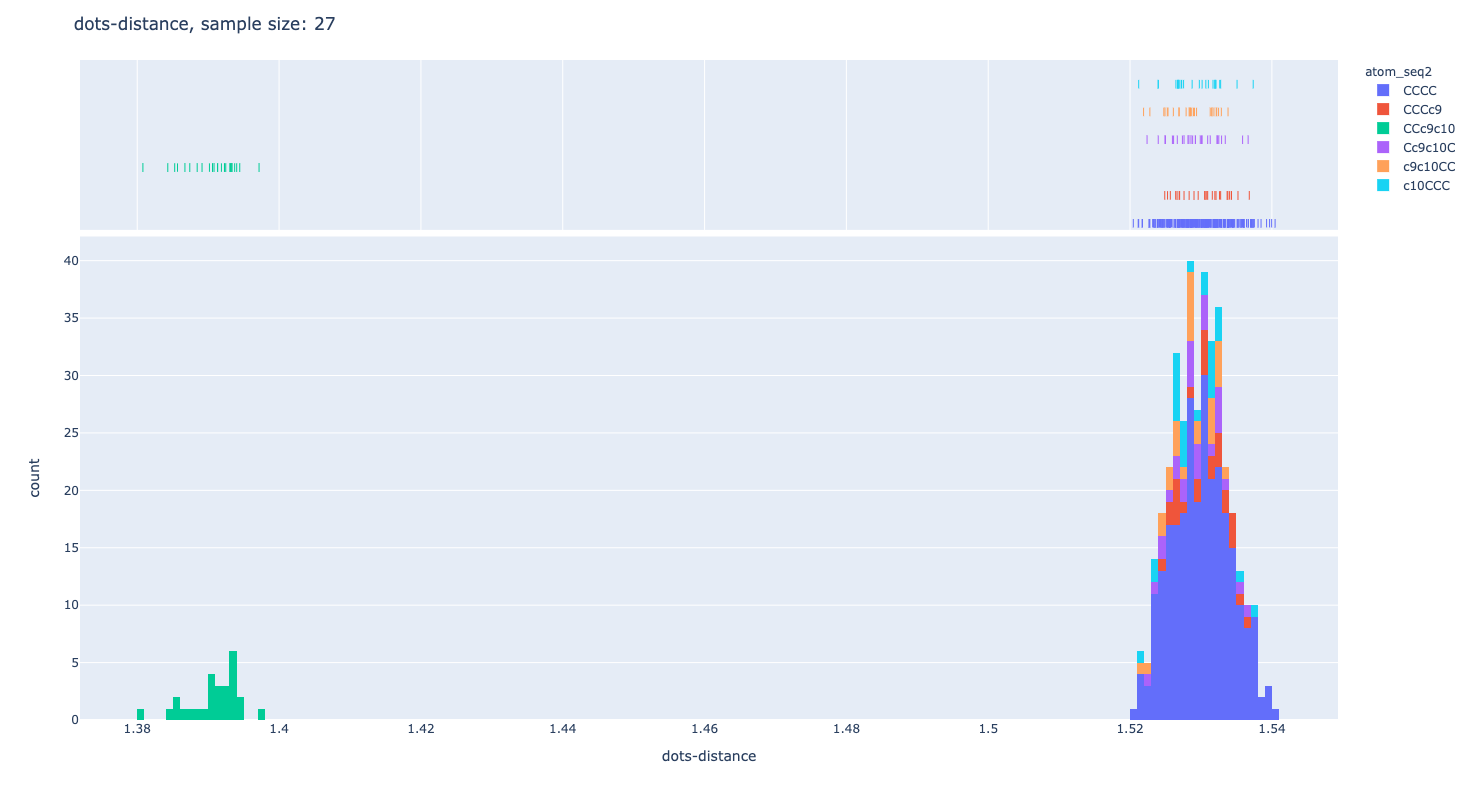

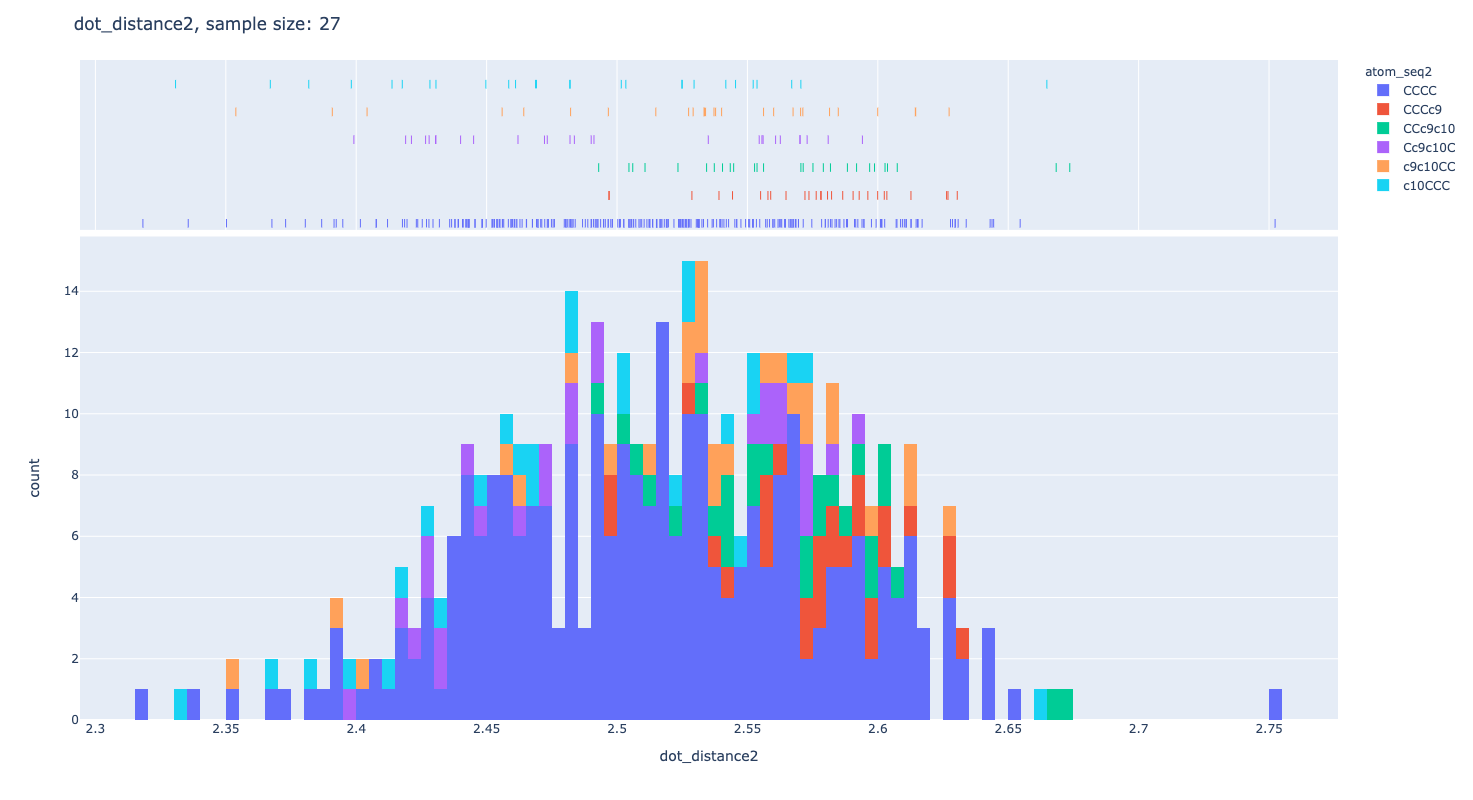

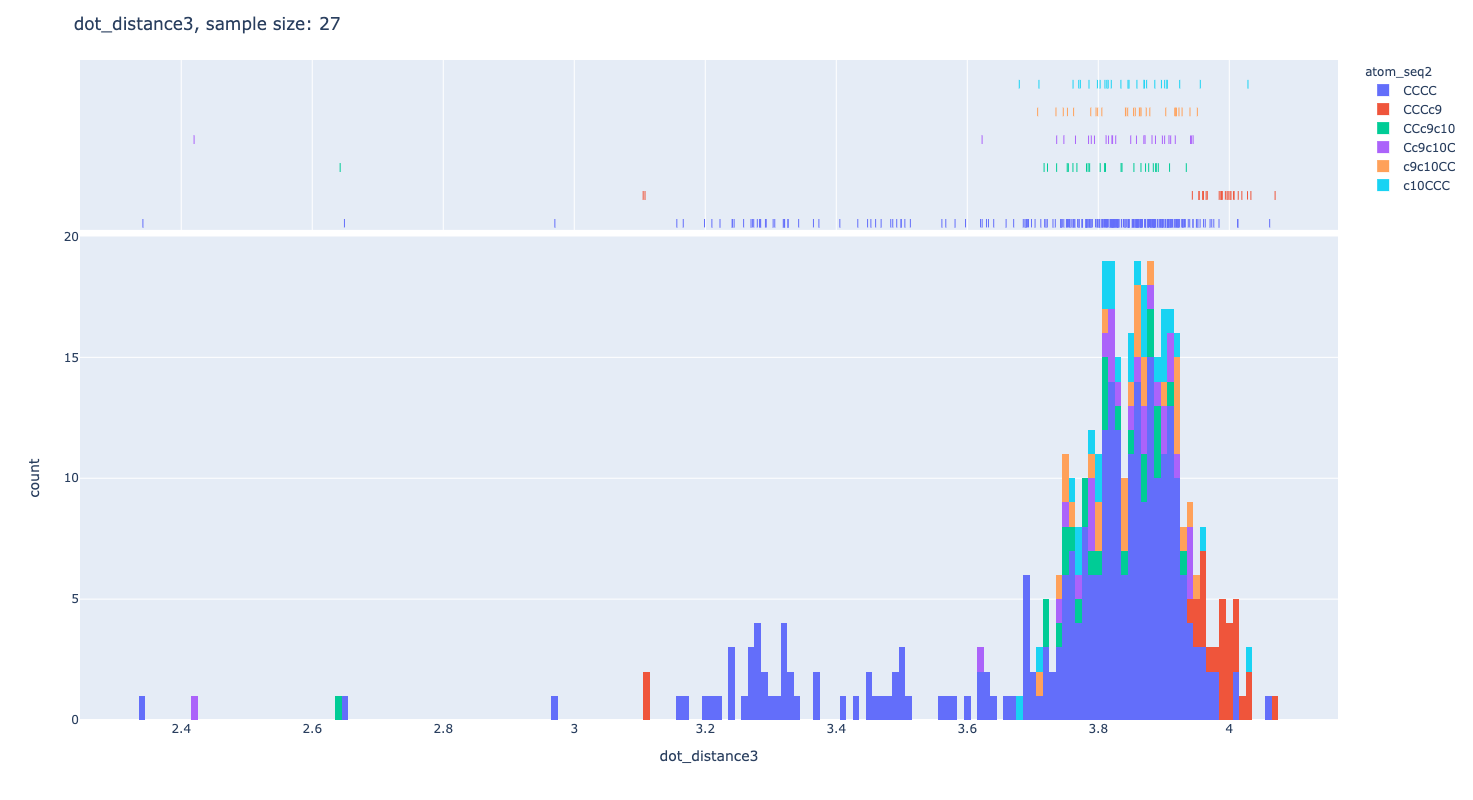

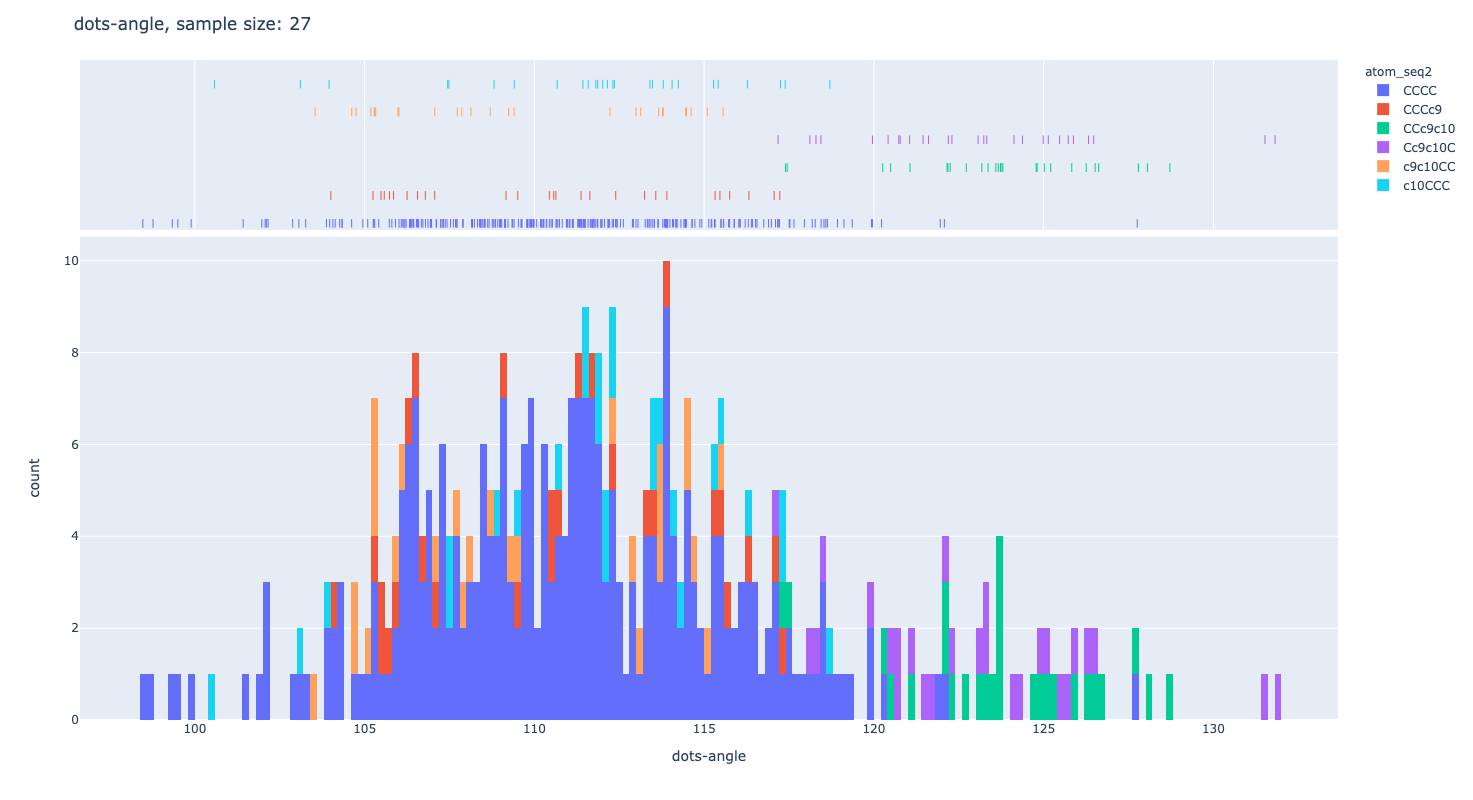

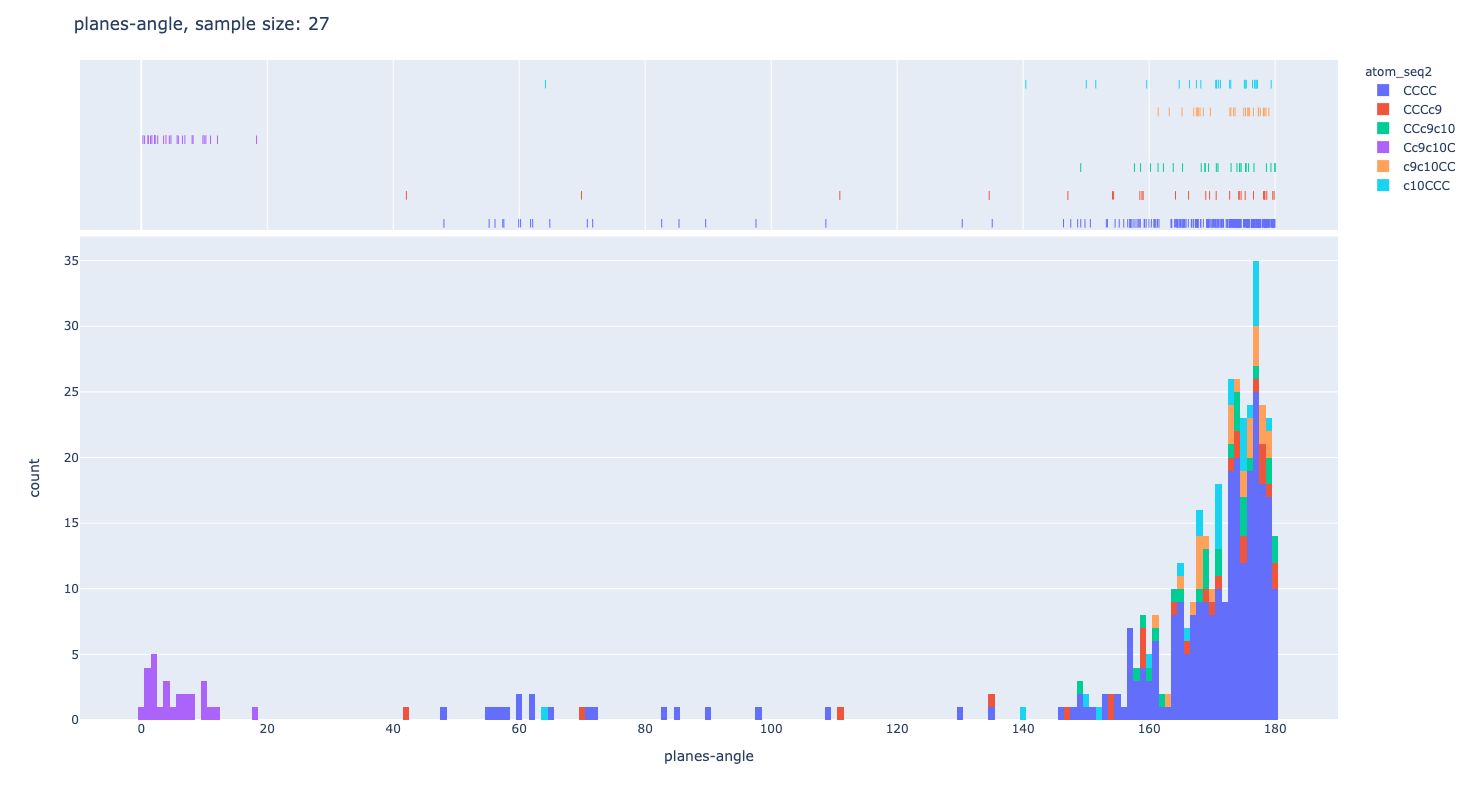

In [130]:
protein_hist(df.dropna(),xlabel="dots-distance")
protein_hist(df.dropna(),xlabel="dot_distance2")
protein_hist(df.dropna(),xlabel="dot_distance3")
protein_hist(df.dropna(),xlabel="dots-angle")
protein_hist(df.dropna(),xlabel="planes-angle")

### Simulation

In [67]:
Cx = portein_format_list[0]['Cx']

In [68]:
protein_distr = [ df.loc[df['Cx']==c,['Cx','dots-angle','dots-distance','planes-angle']] for c in Cx ]
atom2distr = dict(zip(Cx, protein_distr))

In [69]:
def protine_sim(Cx, n_sim=1):
    sim_df = pd.concat([pd.concat([atom2distr[c][['Cx','dots-angle','dots-distance', 'planes-angle']].sample(n=1, random_state=x) for c in Cx]) for x in range(n_sim)])
    return(sim_df)

In [70]:
#protine_sim_df = protine_sim(Cx, n_sim=300)

C_tmp = ["C"+str(x) for x in range(1,19)]
C_tmp

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18']

In [71]:
protine_sim_df = protine_sim(C_tmp, n_sim=500)

display(protine_sim_df)
protine_sim_df.to_csv("output/simulated_data.csv")

Cx  dots-angle  dots-distance  planes-angle
40    C1    0.000000       1.527514      0.000000
41    C2  115.646322       1.536912      0.000000
42    C3  106.559599       1.529771    176.428169
43    C4  114.727982       1.533786    167.664707
44    C5  108.465842       1.525287    177.132258
..   ...         ...            ...           ...
333  C14  115.568725       1.531796    177.606354
334  C15  113.784359       1.526467    179.394319
335  C16  108.158060       1.524467    168.225539
336  C17  115.136978       1.533428    173.076371
337  C18  116.066240       1.359596    150.247730

[9000 rows x 4 columns]

In [72]:
def protein_sim_plot(df,xlabel="dots-angle",):
    n_sim = sum(protine_sim_df['Cx'] == 'C8')
    fig = px.histogram(df, x=xlabel, color="Cx", nbins=100,marginal="rug")
    fig.update_layout(title="Simulated {0}, n_sim: {1}".format(xlabel, n_sim))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_sim.html".format(xlabel))
    pio.write_image(fig, "output/{}_sim.png".format(xlabel))

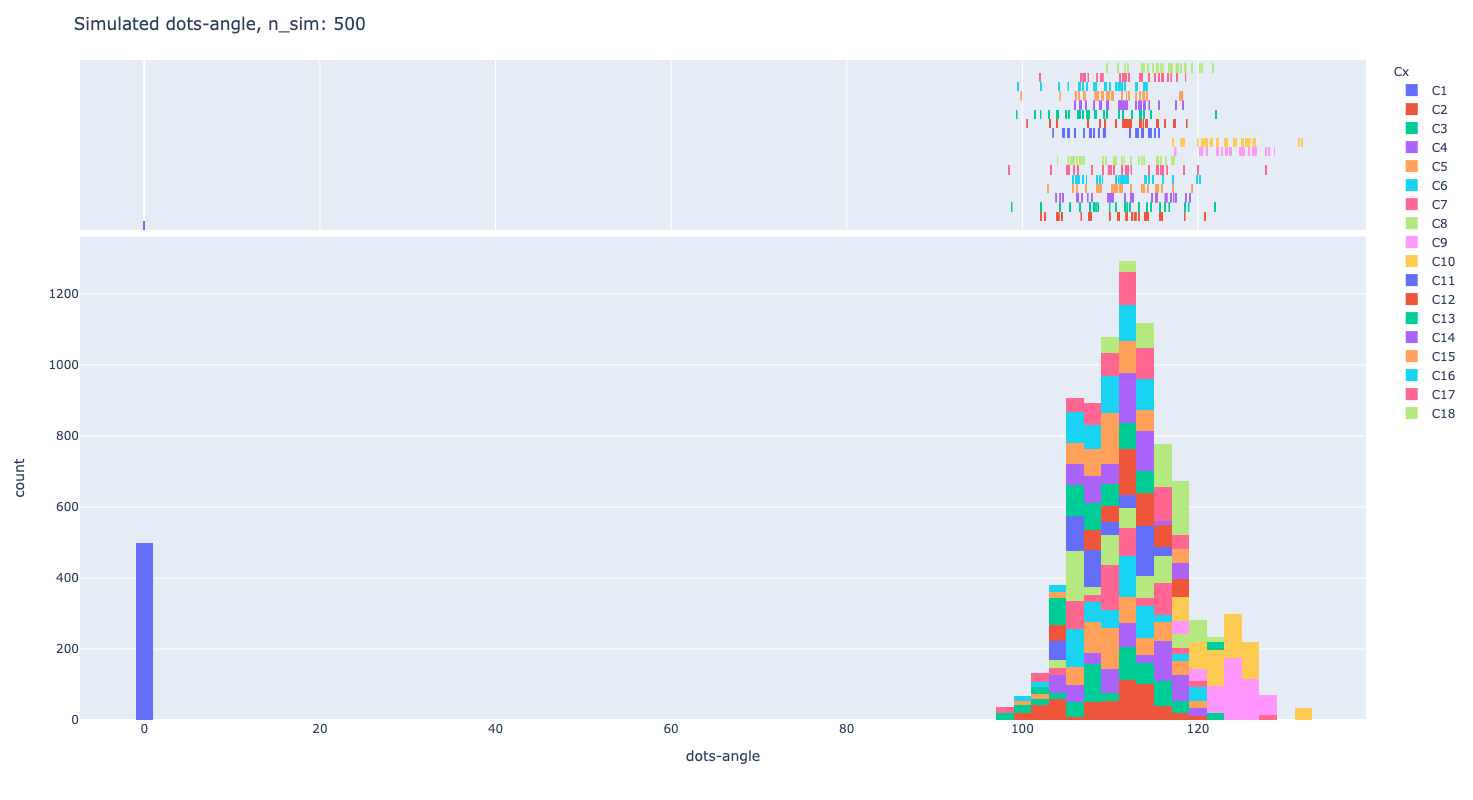

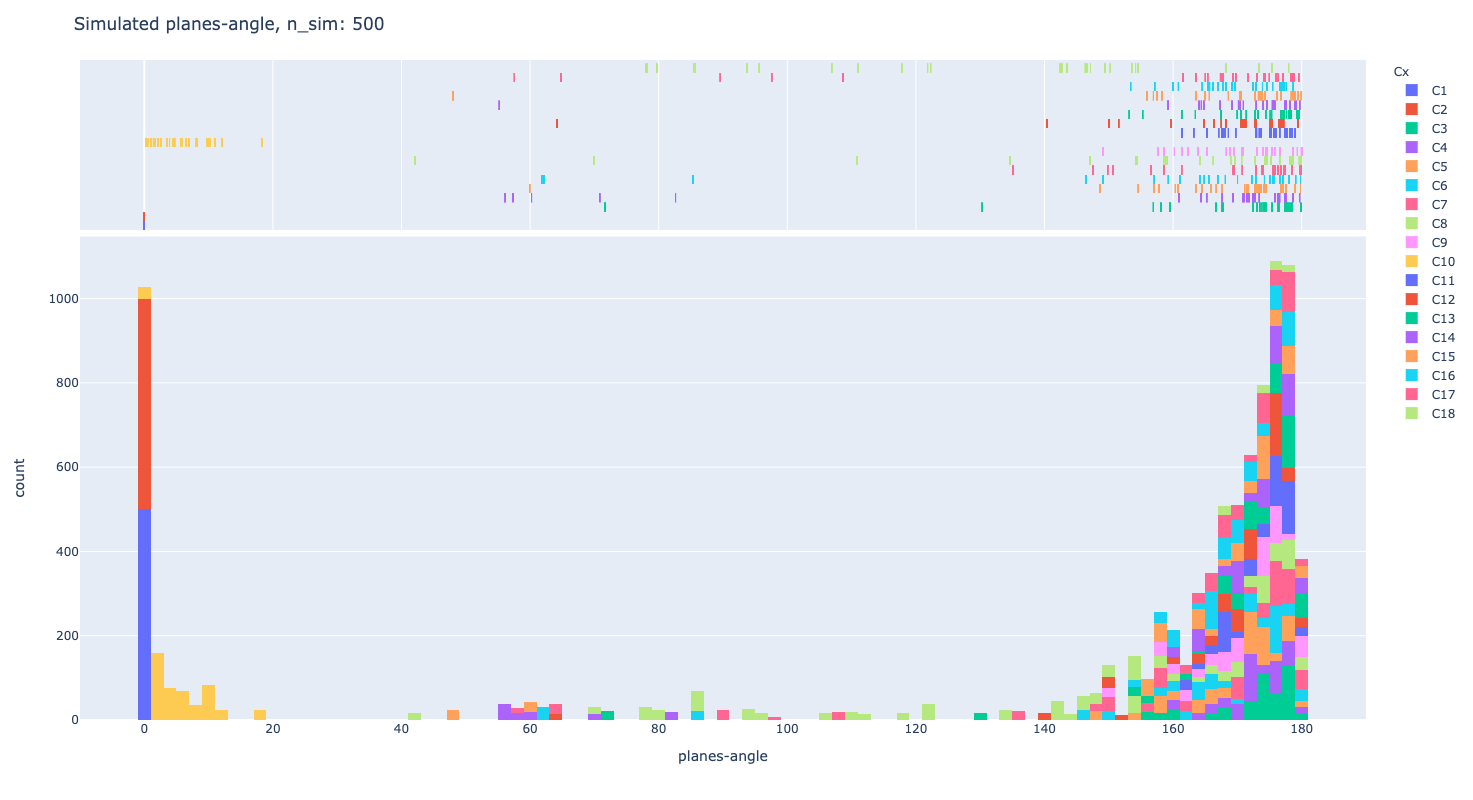

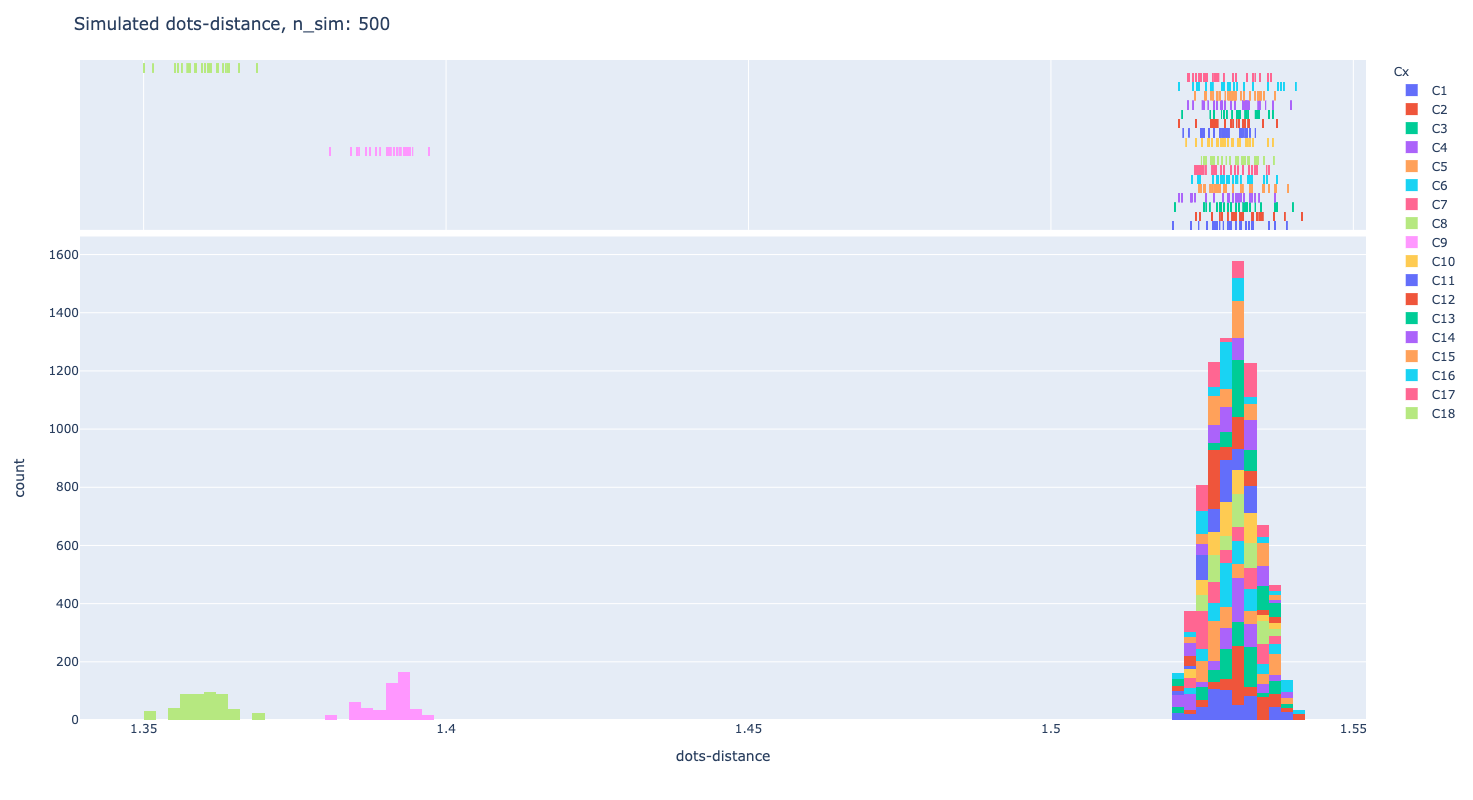

In [73]:
protein_sim_plot(protine_sim_df,xlabel="dots-angle")
protein_sim_plot(protine_sim_df,xlabel="planes-angle")
protein_sim_plot(protine_sim_df,xlabel="dots-distance")

In [74]:
import os
os.system("gsutil -m cp output/*.html gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.png gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.csv gs://protein-dynamics-ai/")

30720

dot_length  = (C, D)

dot_angle   = (B, C, D)

plane_angle = (A, B, C, D)
